In [2]:
#For google colab

"""def mount_drive(dir):
  import os
  colab = 1
  if colab == 1:
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    current_folder = dir
    dest_folder = '/content/drive/My Drive/' + current_folder
    os.chdir(dest_folder)
    print('\n Current path: ' + os.getcwd())

mount_drive('')"""

"def mount_drive(dir):\n  import os\n  colab = 1\n  if colab == 1:\n    from google.colab import drive\n    drive.mount('/content/drive', force_remount = True)\n    current_folder = dir\n    dest_folder = '/content/drive/My Drive/' + current_folder\n    os.chdir(dest_folder)\n    print('\n Current path: ' + os.getcwd())\n\nmount_drive('')"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import Counter
import datetime
from matplotlib.pyplot import figure
import numpy as np
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
from pathlib import Path




In [4]:
load_dotenv(dotenv_path=Path(r"C:\Users\EJTri\Documents\spotify\eda\eda_with_sql.ipynb").resolve().parent.parent / ".env")

db_user = os.getenv("POSTGRES_USER")
db_pass = os.getenv("POSTGRES_PASSWORD")
db_host = os.getenv("POSTGRES_HOST")
db_port = os.getenv("POSTGRES_PORT")
db_name = os.getenv("POSTGRES_DB")

engine = create_engine(f"postgresql+psycopg2://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}")

In [5]:
all_tracks = pd.read_sql("SELECT * FROM all_tracks_saved", engine)
recent_songs = pd.read_sql("SELECT * FROM recent_songs", engine)
top_art = pd.read_sql("SELECT * FROM top_artists", engine)
top_songs = pd.read_sql("SELECT * FROM top_songs", engine)

In [6]:
all_tracks.head()

,track_name,artist_name,artist_genre,album_name,release_date,album_track_amount,song_duration_minutes,popularity_score,track_number_on_album,playlist
0,Antpile 2,Kublai Khan TX,"[""hardcore"", ""deathcore"", ""metalcore""]",Exhibition Of Prowess,2024-09-20,10,0.948285,56,10,My top tracks playlist
1,In Bloom,Sturgill Simpson,"[""outlaw country"", ""alt country"", ""bluegrass"",...",A Sailor's Guide to Earth,2016-04-15,9,4.010675,59,5,My top tracks playlist
2,Killed By An Angel,Sunny Day Real Estate,"[""midwest emo"", ""emo"", ""post-hardcore"", ""math ...",The Rising Tide,2000-06-20,11,4.925560,45,1,My top tracks playlist
3,Beer,Reel Big Fish,"[""ska"", ""ska punk"", ""punk""]",Turn The Radio Off,1996,15,3.508890,61,6,My top tracks playlist
4,Concorde,"Black Country, New Road","[""art rock"", ""post-rock"", ""post-punk""]",Ants From Up There,2022-02-04,10,6.062895,58,3,My top tracks playlist


In [7]:
all_tracks["artist_genre"] = all_tracks["artist_genre"].apply(literal_eval)
top_art["artist_genre"] = top_art["artist_genre"].apply(literal_eval)
top_songs["artist_genre"] = top_songs["artist_genre"].apply(literal_eval)

In [8]:
all_tracks = all_tracks.dropna()

In [9]:
all_tracks = all_tracks.drop(all_tracks[all_tracks.song_duration_minutes == 0.000000].index)

In [10]:
top_songs['release_date'] = pd.to_datetime(top_songs['release_date'], format='mixed')
top_songs = top_songs.dropna(subset=['release_date'])
top_songs['decade'] = (top_songs['release_date'].dt.year // 10) * 10
top_songs['decade'] = top_songs['decade'].astype(int).astype(str) + 's'

recent_songs['release_date'] = pd.to_datetime(recent_songs['release_date'], format='mixed')
recent_songs = recent_songs.dropna(subset=['release_date'])
recent_songs['decade'] = (recent_songs['release_date'].dt.year // 10) * 10
recent_songs['decade'] = recent_songs['decade'].astype(int).astype(str) + 's'

all_tracks['release_date'] = pd.to_datetime(all_tracks['release_date'], format='mixed')
all_tracks = all_tracks.dropna(subset=['release_date'])
all_tracks['decade'] = (all_tracks['release_date'].dt.year // 10) * 10
all_tracks['decade'] = all_tracks['decade'].astype(int).astype(str) + 's'

In [11]:
list_genres_in_all_tracks = []

for i in range(0, len(all_tracks)):
  list_genres_in_all_tracks = list_genres_in_all_tracks + all_tracks.iloc[i]["artist_genre"]

count_genres = Counter(list_genres_in_all_tracks)

In [12]:
count_genres_top_10 = dict(sorted(count_genres.items(), key=lambda x: x[1], reverse=True)[:10])

X_value_genres = list(count_genres_top_10.keys())
Y_value_genres = list(count_genres_top_10.values())

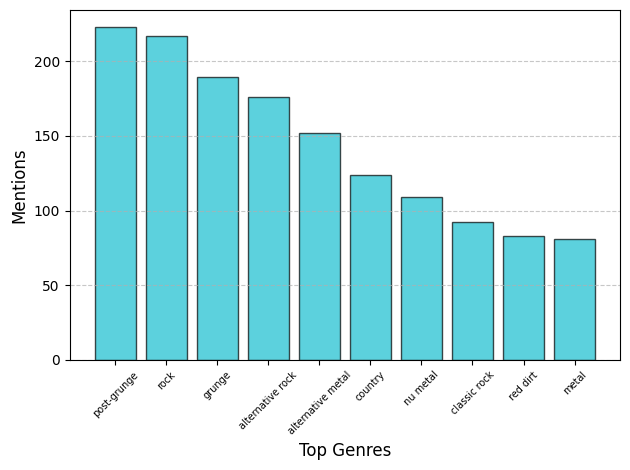

In [13]:
plt.bar(X_value_genres, Y_value_genres, color='#17becf', alpha=0.7, edgecolor='black')
plt.ylabel("Mentions", fontsize=12)
plt.xlabel("Top Genres", fontsize=12)
plt.xticks(rotation=45, fontsize=7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [14]:
overall_top_decade_count = top_songs["decade"].value_counts().sort_index()
terms_top_decade_count = top_songs.groupby('term')['decade'].value_counts().sort_index()

In [15]:
overall_count_vals = overall_top_decade_count.values
overall_count_keys = overall_top_decade_count.keys()

long_term_vals = terms_top_decade_count["long"].values
long_term_keys = terms_top_decade_count["long"].keys()

med_term_vals = terms_top_decade_count["medium"].values
med_term_keys = terms_top_decade_count["medium"].keys()

short_term_vals = terms_top_decade_count["short"].values
short_term_keys = terms_top_decade_count["short"].keys()

In [16]:
colors_box_sub_plot = ["#1f77b4",
          "#2ca02c",
          "#76d7c4",
          "#a9dfbf"]

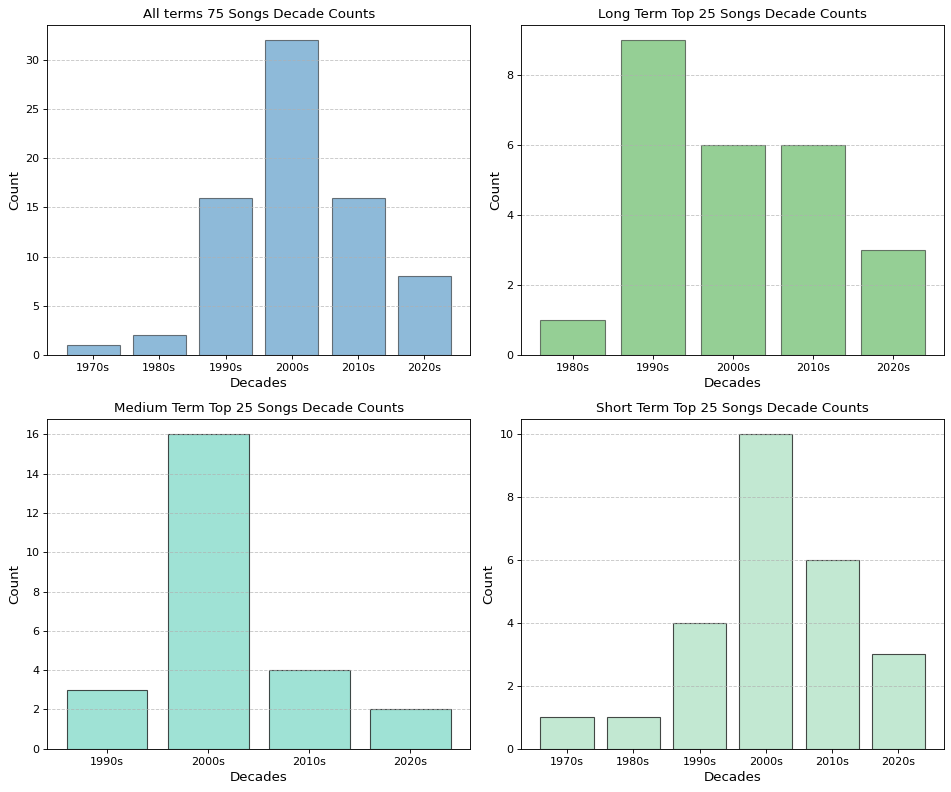

In [17]:
figure(figsize=(12, 10), dpi=80)

plt.subplot(2, 2, 1)
plt.bar(overall_count_keys,overall_count_vals, color = colors_box_sub_plot[0], alpha=0.5, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("All terms 75 Songs Decade Counts")

plt.subplot(2, 2, 2)
plt.bar(long_term_keys, long_term_vals, color = colors_box_sub_plot[1], alpha=0.5, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Long Term Top 25 Songs Decade Counts")

plt.subplot(2, 2, 3)
plt.bar(med_term_keys, med_term_vals, color = colors_box_sub_plot[2], alpha=0.7, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Medium Term Top 25 Songs Decade Counts")

plt.subplot(2, 2, 4)
plt.bar(short_term_keys, short_term_vals, color = colors_box_sub_plot[3], alpha=0.7, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Short Term Top 25 Songs Decade Counts")


plt.show()

In [18]:
top_songs_short = top_songs[top_songs["term"] == "short"]
top_songs_med = top_songs[top_songs["term"] == "medium"]
top_songs_long = top_songs[top_songs["term"] == "long"]

short_songs_duration = np.array(top_songs_short["song_duration_minutes"])
med_songs_duration = np.array(top_songs_med["song_duration_minutes"])
long_songs_duration = np.array(top_songs_long["song_duration_minutes"])

most_recent_25_songs = recent_songs.iloc[:25]["song_duration_minutes"]
recent_songs_duration = np.array(most_recent_25_songs)

In [19]:
combined_durations = [short_songs_duration, med_songs_duration, long_songs_duration, recent_songs_duration]

mean = [np.mean(d) for d in combined_durations]
std_devs = [np.std(d) for d in combined_durations]

The green(teal) dot is the mean with the line being the standard deviation while the blue line is the median.


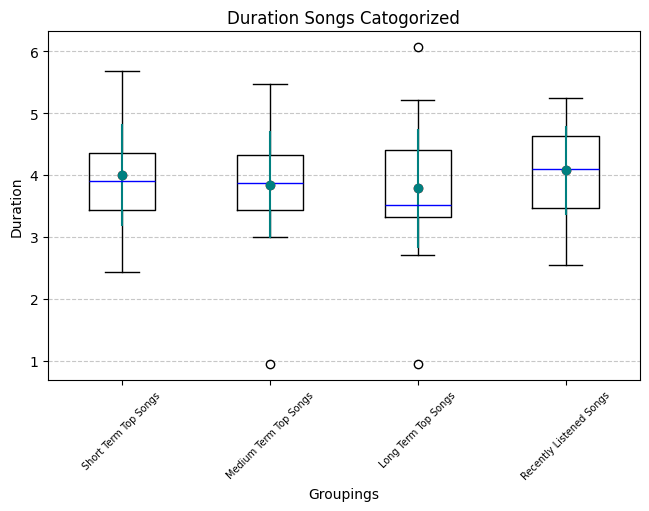

In [20]:
print("The green(teal) dot is the mean with the line being the standard deviation while the blue line is the median.")

plt.boxplot(combined_durations, positions=[1, 2, 3, 4], tick_labels = ["Short Term Top Songs", "Medium Term Top Songs",
                                                                  "Long Term Top Songs", "Recently Listened Songs"],
            medianprops=dict(color='blue'))

for i in range(len(mean)):
   plt.plot(i + 1, mean[i], 'ro')
   plt.errorbar(i + 1, mean[i], yerr=std_devs[i], fmt='o', color='teal')

plt.xticks(rotation=45, fontsize=7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Duration Songs Catogorized")
plt.xlabel("Groupings")
plt.ylabel("Duration")
plt.show()